<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [197]:
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [198]:
penguim = sns.load_dataset('penguins')

In [199]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

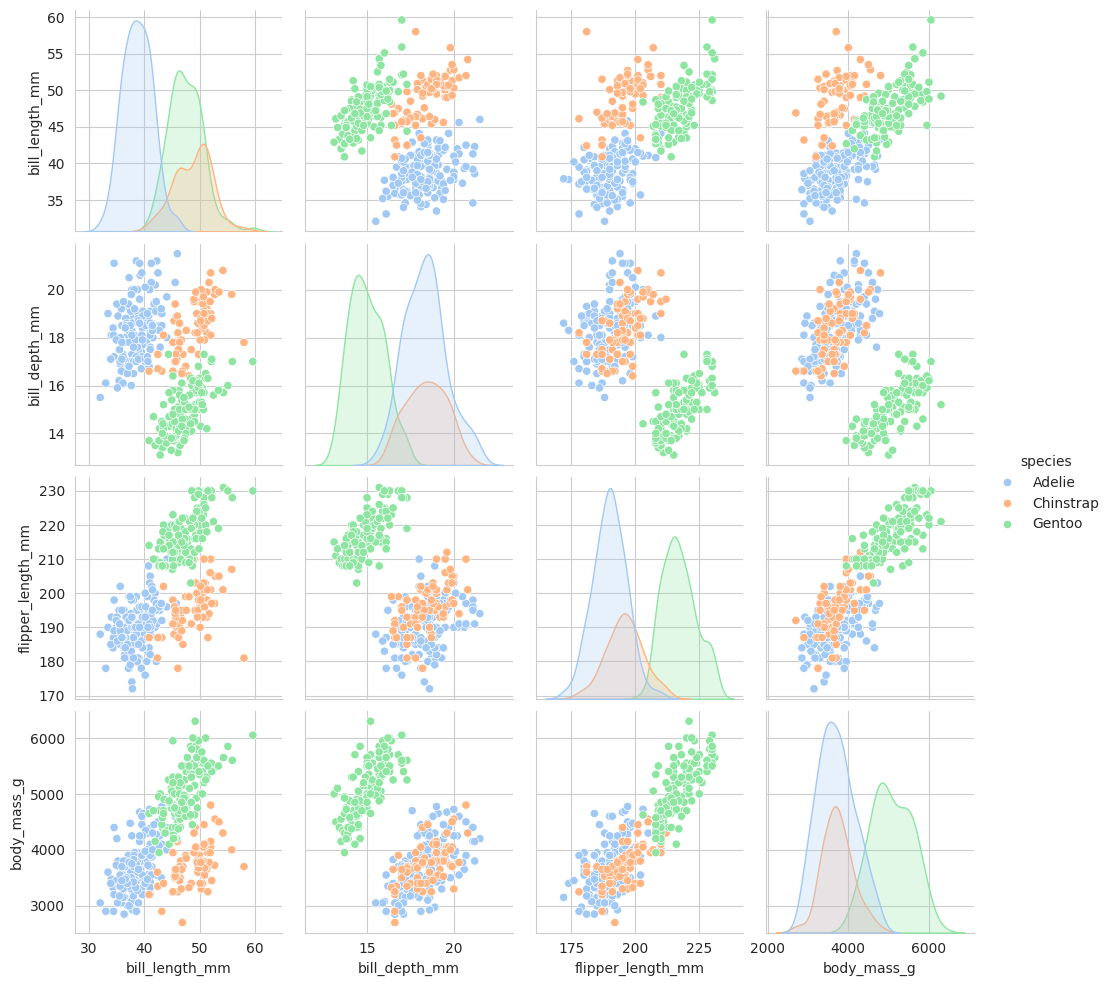

In [200]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** Olhando os gráficos podemos tirar alguns insghts: Os pinguins da espécie "Adelie" possuem o menor comprimento das espécies analisadas.

A espécie "Gentoo" possui a maior nadadeira entre as espécies e são os que mais possuem massa corporal.

Os pinguins da espécie "Chinstrap" não possuem uma característica tão forte, quando olhamos a massa corporal e o tamanho da nadadeira, essa espécie se assimila muito à "Adelie" e o comprimento se equipara um pouco ao da espécie "Gentoo".

 - Sexo por espécie:

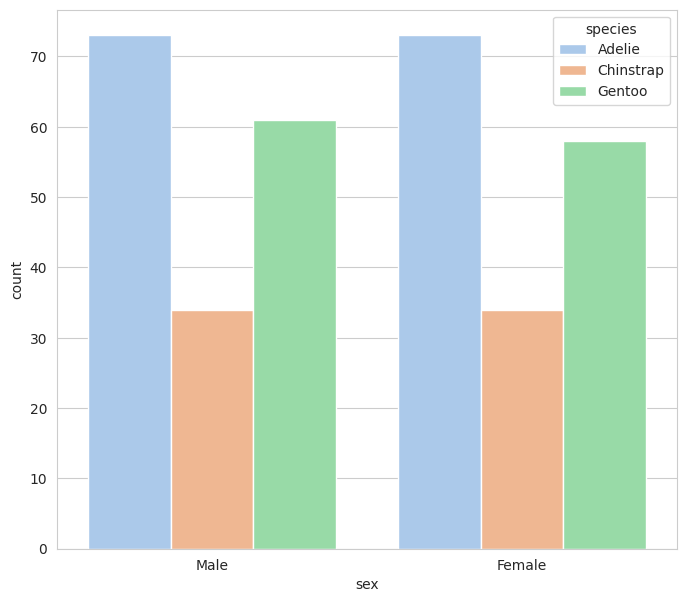

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 7))
    grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** Observando a figura percebemos que não existe uma disparidade entre as espécies, a quantidade entre machos e fêmeas está bem equilibrada.

 - Ilha por espécie:

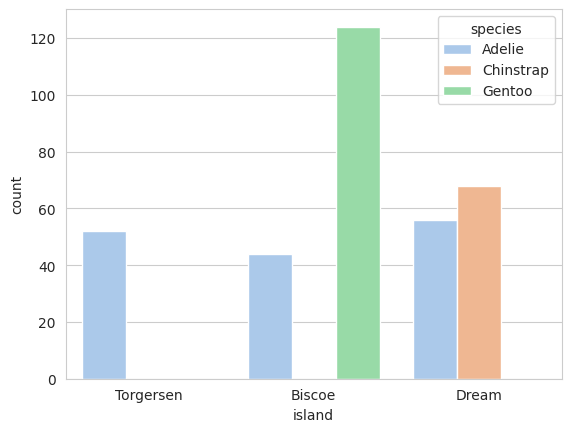

In [202]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** A espécie de pinguin "Adelie" está presente em todas as ilhas, por outro lado percebemos que as outras espécies estão, em sua totalidade, nas outras ilhas, a espécie "Gentoo" na ilha "Biscoe" e a "Chinstrap" na ilha "Dream".

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [203]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [204]:
# resposta da questão 2.1
#Verificando os valores nulos do data frame
print(penguim.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [205]:
#removendo os valores nulos
penguim = penguim.dropna()

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [206]:
# resposta da questão 2.2
#verificando os tipos de dados
penguim.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [207]:
#tratando a coluna "island" para ficar com atributos numéricos

island_num = {
    "Torgersen": 1,
    "Biscoe": 2,
    "Dream": 3
}

penguim['island_nom'] = penguim['island'].apply(lambda num: island_num[num])

<ipython-input-207-f2c3ffb909c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim['island_nom'] = penguim['island'].apply(lambda num: island_num[num])


In [208]:
#tratando a coluna "sex"

penguim['sex_ord'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 2)

<ipython-input-208-a58cb55ffc49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim['sex_ord'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 2)


In [209]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_nom,sex_ord
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,1


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [210]:
# resposta da questão 2.3
#removendo as colunas originais que foram tratadas
penguim = penguim.drop(['island','sex'], axis=1)

In [211]:
display(penguim)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom,sex_ord
0,Adelie,39.1,18.7,181.0,3750.0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,1,2
2,Adelie,40.3,18.0,195.0,3250.0,1,2
4,Adelie,36.7,19.3,193.0,3450.0,1,2
5,Adelie,39.3,20.6,190.0,3650.0,1,1
...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,2,2
340,Gentoo,46.8,14.3,215.0,4850.0,2,2
341,Gentoo,50.4,15.7,222.0,5750.0,2,1
342,Gentoo,45.2,14.8,212.0,5200.0,2,2


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [212]:
# resposta da questão 2.4

predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(['species'], axis=1),
    penguim['species'],
    test_size=0.33,
    random_state=42
)

In [213]:
#verificando os dados de treino(223 que representa 66%)
display(predictors_train)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom,sex_ord
44,37.0,16.9,185.0,3000.0,3,2
318,48.4,14.4,203.0,4625.0,2,2
110,38.1,16.5,198.0,3825.0,2,2
161,51.3,19.9,198.0,3700.0,3,1
199,49.0,19.6,212.0,4300.0,3,1
...,...,...,...,...,...,...
194,50.9,19.1,196.0,3550.0,3,1
77,37.2,19.4,184.0,3900.0,1,1
112,39.7,17.7,193.0,3200.0,2,2
277,45.5,15.0,220.0,5000.0,2,1


In [214]:
#verificando os dados de teste (110 linhas que representa 33%)
display(predictors_test)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_nom,sex_ord
30,39.5,16.7,178.0,3250.0,3,2
317,46.9,14.6,222.0,4875.0,2,2
79,42.1,19.1,195.0,4000.0,1,1
201,49.8,17.3,198.0,3675.0,3,2
63,41.1,18.2,192.0,4050.0,2,1
...,...,...,...,...,...,...
15,36.6,17.8,185.0,3700.0,1,2
231,49.0,16.1,216.0,5550.0,2,1
233,48.4,14.6,213.0,5850.0,2,1
87,36.9,18.6,189.0,3500.0,3,2


In [215]:
target_train.head()

44        Adelie
318       Gentoo
110       Adelie
161    Chinstrap
199    Chinstrap
Name: species, dtype: object

In [216]:
target_test.head()

30        Adelie
317       Gentoo
79        Adelie
201    Chinstrap
63        Adelie
Name: species, dtype: object

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** O número de folhas da árvore treinada é: 11

In [217]:
# resposta da questão 3.1
model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)
num_folhas = model.tree_.n_leaves

print("O número de folhas da árvore treinada é:", num_folhas)

O número de folhas da árvore treinada é: 11


In [218]:
model.__dict__


{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_nom', 'sex_ord'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x781ee746cea0>}

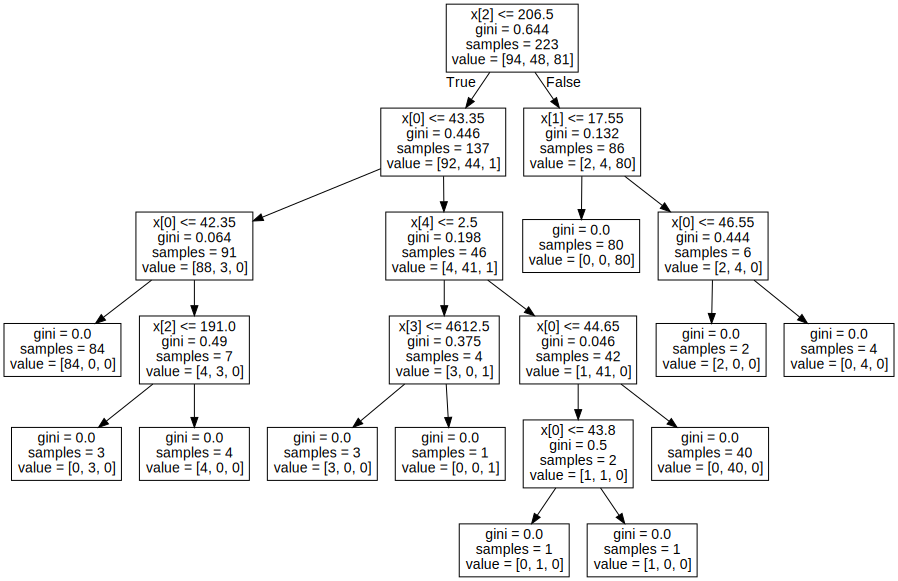

In [219]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** Analisando o gráfico de "calor", é possível perceber que dos 53 pinguins da espécie "Adelie" o modelo acertou 52, que representa 98,1& de acerto. Nas outras 2 espécies "Chinstrap" e "Gentoo", o modelo conseguiu acertar 100%.

In [228]:
# Realizando a previsão
target_predicted = model.predict(predictors_test)

In [227]:
target_test.shape

(110,)

In [233]:
# Realizando a previsão
conf_matrix = confusion_matrix(target_test, target_predicted)
print(conf_matrix)

[[52  0  0]
 [ 1 19  0]
 [ 0  0 38]]


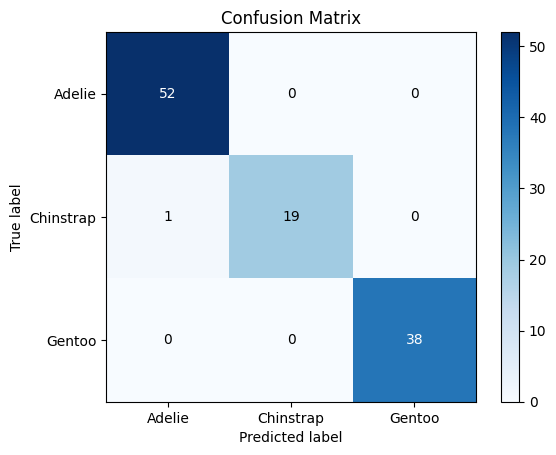

In [234]:
# Calculando a matriz
conf_matrix = confusion_matrix(target_test, target_predicted)

# plotando o gráfico
skplt.metrics.plot_confusion_matrix(target_test, target_predicted)
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [237]:
#verificando a quantidade total do modelo de teste

total = conf_matrix.sum()
print(total)


110


In [239]:
#verificando a quantidade de acertos
acertos = np.diag(conf_matrix).sum()
print(acertos)

109


In [242]:
#realizando o cáculo
acuracia = acertos / total
print(acuracia)

0.990909090909091


In [243]:
#formatando para %
print(f"{round(100 * acuracia, 2)}%")

99.09%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

Atenção no uso do modelo: A ilha deverá ser informada para o modelo em formato de número: "Torgersen": 1,
    "Biscoe": 2,
    "Dream": 3

O sexo do animal também: 1 para "Male" e 2 para "Female"

In [257]:
# resposta da questão 4.1
novo_pinguim = np.array([2, 38.2, 18.1, 185.0, 3950.0, 1])
predicao_pinguim = model.predict(novo_pinguim.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [259]:
print(f'De acordo com os dados fornecidos o modelo trouxe a espécie: {predicao_pinguim[0]}')

De acordo com os dados fornecidos o modelo trouxe a espécie: Adelie


---